# GPTZero threshold

In [2]:
# finding gptzero threshold

import sys
import json
import numpy as np
import pandas as pd
from tqdm import tqdm 
import seaborn as sns
sys.path.append("/Users/bobaebak/git/ai_text_detection")
# sys.path.append("/mnt/data/bobae/ai_text_detection")

from models.gptzero_detector import *
from utils.text_helper import tokenize_text
from utils.plot_helper import *

# human threshold

In [4]:
# human data

# loads a tofel dataset
with open('../dataset/human/tofel.json', "r") as f:
    h_tofel_dataset = json.load(f)

# loads an arxiv dataset
with open('../dataset/human/arxiv.json', "r") as f:
    h_arxiv_dataset = json.load(f)

# loads student essay
with open('../dataset/human/student_essay.json', "r") as f:
    h_essay_dataset = json.load(f)

# loads student computer essay
with open('../dataset/human/student_cs_essay.json', "r") as f:
    h_essay_cs_dataset = json.load(f)

In [5]:
h_dataset = []
for i in [h_tofel_dataset, h_arxiv_dataset, h_essay_dataset, h_essay_cs_dataset]:
    h_dataset.extend(i)

len(h_dataset)

2478

In [ ]:
json_lst = []

for i, data in enumerate(tqdm(h_dataset)):
    try:
        input = data['input']
        result = detect(input)
        result['num_words'] = len(tokenize_text(input))
        json_lst.append(result)

    except Exception as e:
        print(e)
    
    if i%100 == 0:
        print(f"{i} index finished")

# save as json file
file_path = "".join('/mnt/data/bobae/ai_text_detection/dataset/human/gptzero_human.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(json_lst, f, indent=4)


# AI threshold

In [9]:
# gpt data

# loads a tofel dataset
with open('../dataset/ai/gpt2medium_tofel.json', "r") as f:
    gpt_tofel_dataset = json.load(f)

# loads an arxiv dataset
with open('../dataset/ai/gpt2medium_arxiv.json', "r") as f:
    gpt_arxiv_dataset = json.load(f)

# loads student essay
with open('../dataset/ai/gpt2medium_essay.json', "r") as f:
    gpt_essay_dataset = json.load(f)

# loads student computer essay
with open('../dataset/ai/gpt2medium_essay_cs.json', "r") as f:
    gpt_essay_cs_dataset = json.load(f)

# loads a tofel dataset
with open('../dataset/ai/gpt35_tofel.json', "r") as f:
    gpt_35_tofel_dataset = json.load(f)

# loads student computer essay
with open('../dataset/ai/gpt35_essay_cs.json', "r") as f:
    gpt_35_essay_cs_dataset = json.load(f)

In [10]:
gpt_dataset = []
for i in [gpt_tofel_dataset, gpt_arxiv_dataset, gpt_essay_dataset, gpt_essay_cs_dataset,
          gpt_35_tofel_dataset, gpt_35_essay_cs_dataset]:
    gpt_dataset.extend(i)

len(gpt_dataset)

2956

In [ ]:
json_lst = []

for i, data in enumerate(tqdm(h_dataset)):
    try:
        input = data['input']
        result = detect(input)
        result['num_words'] = len(tokenize_text(input))
        json_lst.append(result)

    except Exception as e:
        print(e)
    
    if i%100 == 0:
        print(f"{i} index finished")

# save as json file
file_path = "".join('/mnt/data/bobae/ai_text_detection/dataset/ai/gptzero_ai.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(json_lst, f, indent=4)


# Analaysis

In [3]:
with open('../dataset/human/gptzero_human.json', "r") as f:
    h_dataset = json.load(f)

with open('../dataset/ai/gptzero_ai.json', "r") as f:
    m_dataset = json.load(f)

In [4]:
print("Average of HUMAN perplexity: ", np.median([item['perplexity_per_line_avg'] for item in h_dataset]))
print("Average of AI perplexity: ", np.median([item['perplexity_per_line_avg'] for item in m_dataset]))

Average of HUMAN perplexity:  311.94571216739433
Average of AI perplexity:  48.4


Before outliers
Mean of HUMAN perplexity:  776.6000220426644
Median of HUMAN perplexity:  311.94571216739433
Mean of AI perplexity:  351.70524250688646
Median of AI perplexity:  48.4
After outliers
Mean of HUMAN perplexity:  421.8550813110505
Median of HUMAN perplexity:  299.75
Mean of AI perplexity:  124.25896263100697
Median of AI perplexity:  47.15


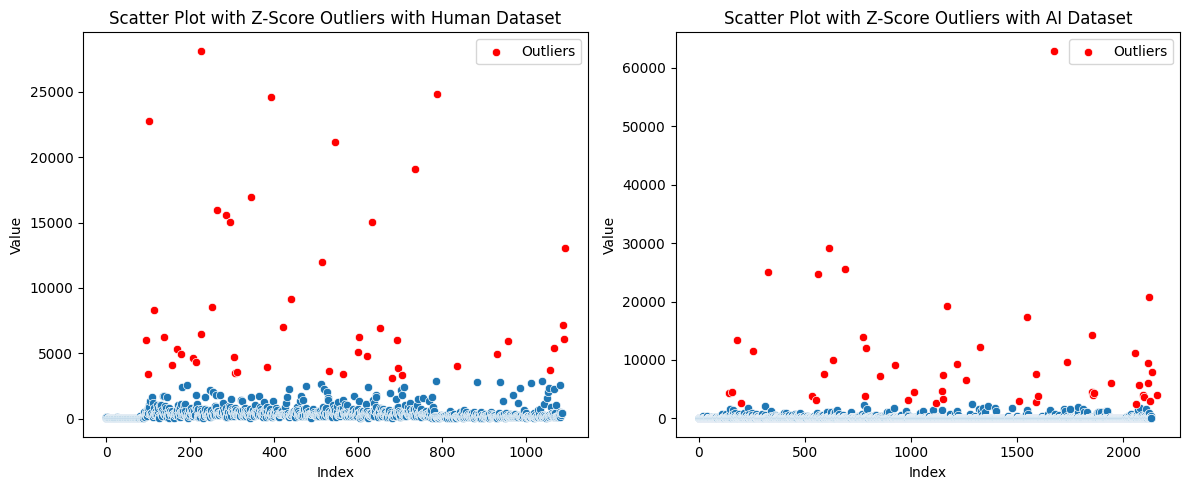

In [49]:
from scipy import stats

# Example dataset (replace with your actual data)
data_h = [item['perplexity_per_line_avg'] for item in h_dataset]
data_m = [item['perplexity_per_line_avg'] for item in m_dataset]

# Convert to DataFrame
df_h = pd.DataFrame(data_h, columns=['Value'])
df_m = pd.DataFrame(data_m, columns=['Value'])

# Calculate Z-scores
df_h['Z-Score'] = np.abs(stats.zscore(df_h['Value']))
df_m['Z-Score'] = np.abs(stats.zscore(df_m['Value']))


# Define threshold for Z-score
z_score_threshold = 1

# Identify outliers
outliers_z_h = df_h[df_h['Z-Score'] > z_score_threshold]
outliers_z_m = df_m[df_m['Z-Score'] > z_score_threshold]

print("Before outliers")
print("Mean of HUMAN perplexity: ", df_h['Value'].mean())
print("Median of HUMAN perplexity: ", df_h['Value'].median())
print("Mean of AI perplexity: ", df_m['Value'].mean())
print("Median of AI perplexity: ", df_m['Value'].median())

df_h.drop(outliers_z_h.index, inplace=True)
df_m.drop(outliers_z_m.index, inplace=True)

print("After outliers")
print("Mean of HUMAN perplexity: ", df_h['Value'].mean())
print("Median of HUMAN perplexity: ", df_h['Value'].median())
print("Mean of AI perplexity: ", df_m['Value'].mean())
print("Median of AI perplexity: ", df_m['Value'].median())


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# Scatter plot for Human Dataset
sns.scatterplot(x=range(len(df_h)), y=df_h['Value'], ax=axes[0])
sns.scatterplot(x=outliers_z_h.index, y=outliers_z_h['Value'], color='red', label='Outliers', ax=axes[0])
axes[0].set_title('Scatter Plot with Z-Score Outliers with Human Dataset')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')
axes[0].legend()

# Scatter plot for AI Dataset
sns.scatterplot(x=range(len(df_m)), y=df_m['Value'], ax=axes[1])
sns.scatterplot(x=outliers_z_m.index, y=outliers_z_m['Value'], color='red', label='Outliers', ax=axes[1])
axes[1].set_title('Scatter Plot with Z-Score Outliers with AI Dataset')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Value')
axes[1].legend()

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


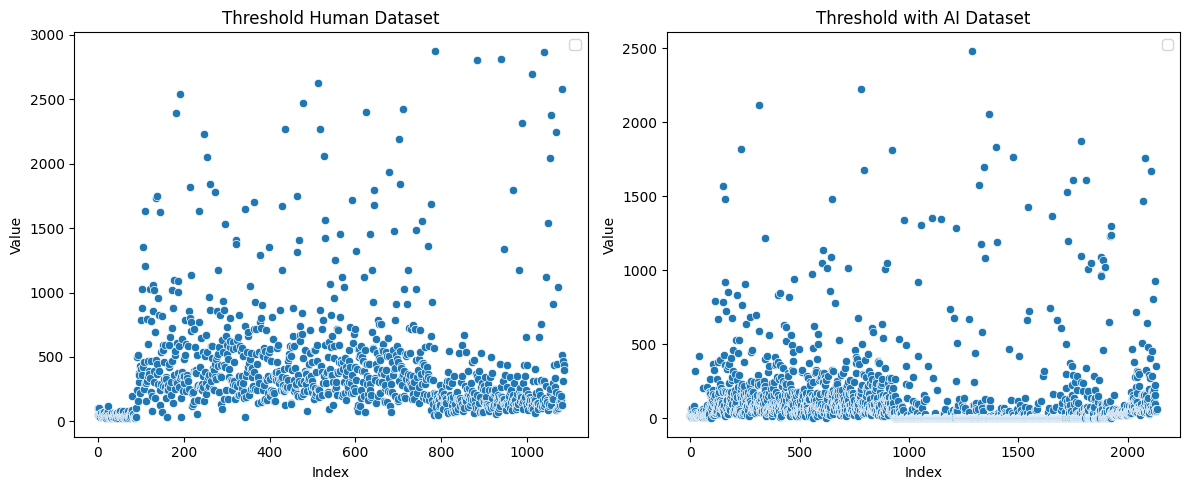

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# Scatter plot for Human Dataset
sns.scatterplot(x=range(len(df_h)), y=df_h['Value'], ax=axes[0])
axes[0].set_title('Threshold Human Dataset')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')
axes[0].legend()

# Scatter plot for AI Dataset
sns.scatterplot(x=range(len(df_m)), y=df_m['Value'], ax=axes[1])
axes[1].set_title('Threshold with AI Dataset')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Value')
axes[1].legend()

plt.tight_layout()
plt.show()

(0.0, 1000.0)

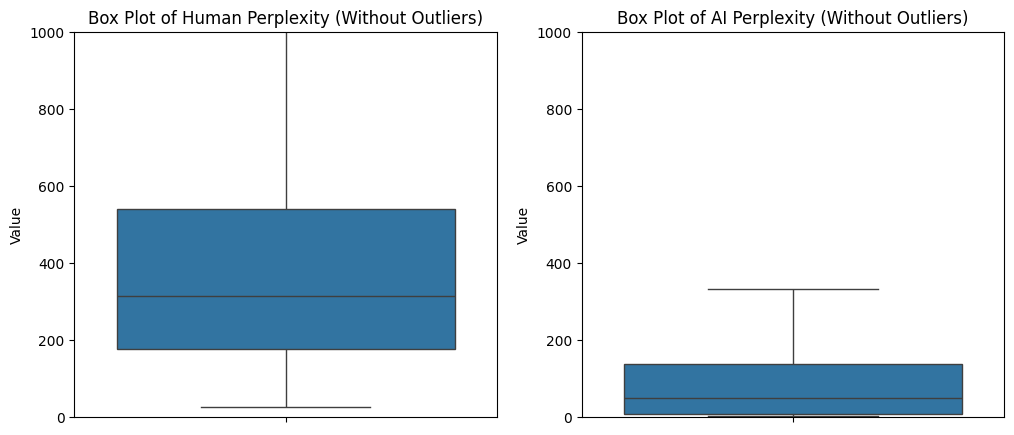

In [46]:
# Example dataset (replace with your actual data)
data_h = [item['perplexity_per_line_avg'] for item in h_dataset]
data_m = [item['perplexity_per_line_avg'] for item in m_dataset]

# Convert to DataFrames
df_h = pd.DataFrame(data_h, columns=['Human_Perplexity'])
df_m = pd.DataFrame(data_m, columns=['AI_Perplexity'])

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Box plot for human perplexity
sns.boxplot(y=df_h['Human_Perplexity'], ax=axes[0], showfliers=False)
axes[0].set_title('Box Plot of Human Perplexity (Without Outliers)')
axes[0].set_ylabel('Value')
axes[0].set_ylim(0, 1000)  # Set x-axis limit to display only the first 1000 data points

# # Box plot for human perplexity
# sns.boxplot(y=df_h['Human_Perplexity'], ax=axes[1])
# axes[1].set_title('Box Plot of Human Perplexity (With Outliers)')
# axes[1].set_ylabel('Value')

# Box plot for AI perplexity
sns.boxplot(y=df_m['AI_Perplexity'], ax=axes[1], showfliers=False)
axes[1].set_title('Box Plot of AI Perplexity (Without Outliers)')
axes[1].set_ylabel('Value')
axes[1].set_ylim(0, 1000)  # Set x-axis limit to display only the first 1000 data points

# # Box plot for AI perplexity
# sns.boxplot(y=df_m['AI_Perplexity'], ax=axes[3])
# axes[3].set_title('Box Plot of AI Perplexity (With Outliers)')
# axes[3].set_ylabel('Value')



(0.0, 1000.0)

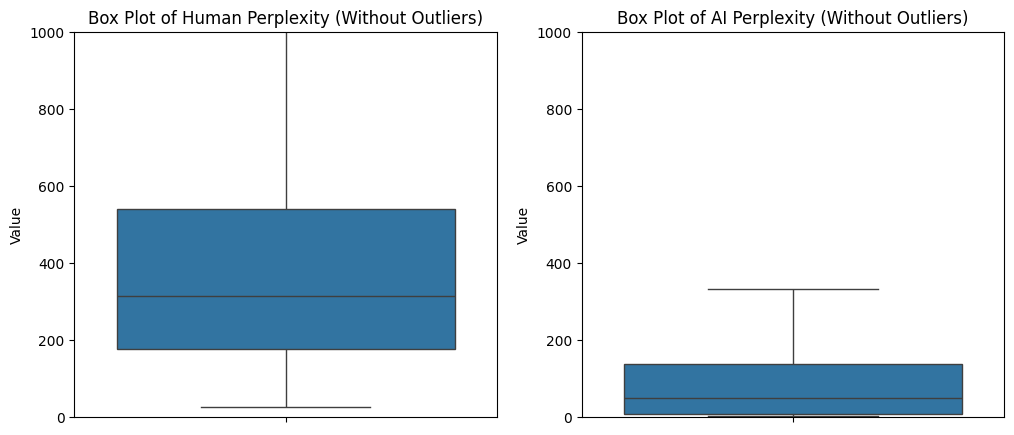

In [32]:
# Example dataset (replace with your actual data)
data_h = [item['perplexity_per_line_avg'] for item in h_dataset]
data_m = [item['perplexity_per_line_avg'] for item in m_dataset]

# Convert to DataFrames
df_h = pd.DataFrame(data_h, columns=['Human_Perplexity'])
df_m = pd.DataFrame(data_m, columns=['AI_Perplexity'])

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Box plot for human perplexity
sns.boxplot(y=df_h['Human_Perplexity'], ax=axes[0], showfliers=False)
axes[0].set_title('Box Plot of Human Perplexity (Without Outliers)')
axes[0].set_ylabel('Value')
axes[0].set_ylim(0, 1000)  # Set x-axis limit to display only the first 1000 data points


# Box plot for AI perplexity
sns.boxplot(y=df_m['AI_Perplexity'], ax=axes[1], showfliers=False)
axes[1].set_title('Box Plot of AI Perplexity (Without Outliers)')
axes[1].set_ylabel('Value')
axes[1].set_ylim(0, 1000)  # Set x-axis limit to display only the first 1000 data points


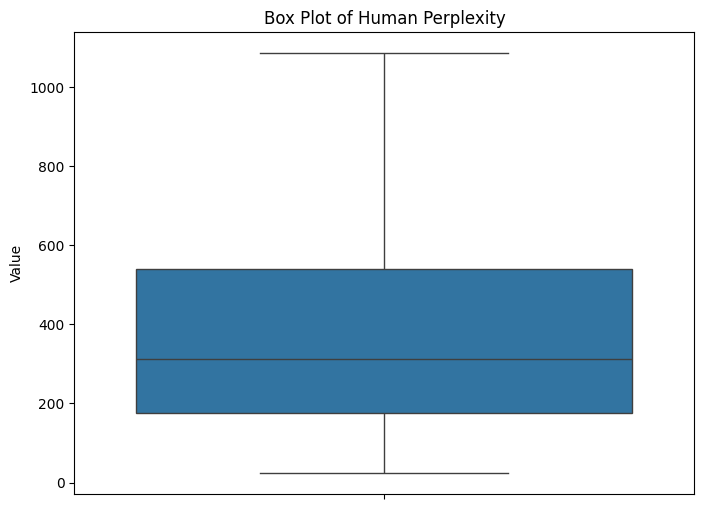

Outliers using Box Plot method:
             Value
94     6021.368421
99     3422.461538
103   22735.666667
108    1353.900000
112    1631.846154
...            ...
1096   1543.000000
1099   2045.351852
1102   2374.620690
1114   2248.838710
1129   2575.888889

[119 rows x 1 columns]
Average of AI perplexity:  326.1922934515061
Median of AI perplexity:  283.3333333333333


In [13]:
import seaborn as sns

# Example dataset (replace with your actual data)
data = [item['perplexity_per_line_avg'] for item in h_dataset]

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Visualization with box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Value'], showfliers=False)  # Switched y and x here
plt.title('Box Plot of Human Perplexity')
plt.ylabel('Value')  # Changed ylabel to reflect the switched axes
plt.show()

# Identify outliers
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_box = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

print("Outliers using Box Plot method:")
print(outliers_box)

# Remove outliers
df = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

print("Average of AI perplexity: ", df['Value'].mean())
print("Median of AI perplexity: ", df['Value'].median())


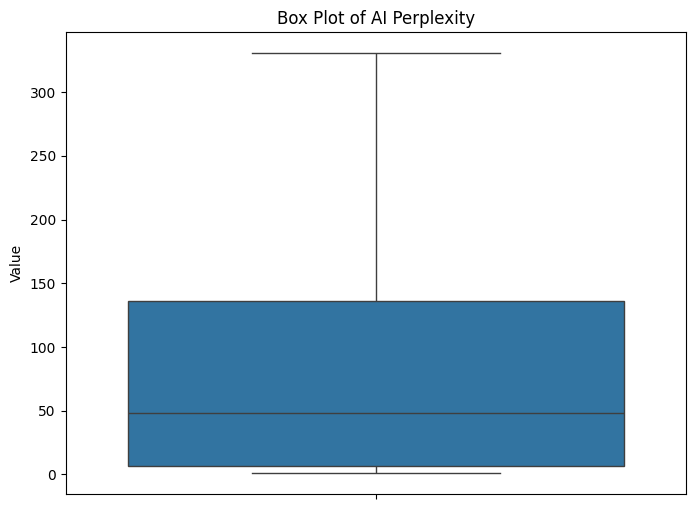

Outliers using Box Plot method:
            Value
42     421.916667
102    371.000000
111    792.357143
125    381.636364
128    671.357143
...           ...
2159  4009.937500
2162   458.303797
2165   806.272727
2174   925.534483
2181   351.152174

[220 rows x 1 columns]
Average of AI perplexity:  65.89593425849267
Median of AI perplexity:  38.75


In [12]:
import seaborn as sns

# Example dataset (replace with your actual data)
data = [item['perplexity_per_line_avg'] for item in m_dataset]

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Visualization with box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Value'], showfliers=False)  # Switched y and x here
plt.title('Box Plot of AI Perplexity')
plt.ylabel('Value')  # Changed ylabel to reflect the switched axes
plt.show()

# Identify outliers
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_box = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

print("Outliers using Box Plot method:")
print(outliers_box)

# Remove outliers
df = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

print("Average of AI perplexity: ", df['Value'].mean())
print("Median of AI perplexity: ", df['Value'].median())